In [19]:
# LABORATORIO 2
# DATASET QUE ME TOCO: BIG MART SALES
# https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales?select=Train-Set.csv

# MIRANDA GUTIERREZ CESAR ALVARO
import os
import numpy as np
from matplotlib import pyplot
# Necesario para graficar superficies
from mpl_toolkits.mplot3d import Axes3D
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [20]:
#importa pandas, es una biblioteca para manipular datos
import pandas as pd
#encoder para transformar etiquetas categoricas a numericas
from sklearn.preprocessing import LabelEncoder
#import datetime for working with dates and times.
from datetime import datetime

In [21]:
# Carga de dataset
# Cargar un archivo CSV utilizando pandas
data = pd.read_csv('/content/Train-Set.csv')

# Seleccionar las primeras 11 columnas como características (X) y la última columna como etiquetas (y)
X = data.iloc[:, :11]
y = data.iloc[:, 11]
# Calcular el tamaño de las etiquetas (muestra)
m = y.size
#imprimir el titulo de cada columna
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('x1','x2', 'x3','x4','x5', 'x6','x7','x8', 'x9','x10','x11', 'y'))
#imprimir una barra con 100 guiones
print('-'*100)
# los datos con este formato solo se imprimiran si todos son valores numericos.
#for i in range(10):
 # print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(X[i,0],X[i,1],X[i,2],X[i,3],X[i,4],X[i,5],X[i,6],X[i,7],X[i,8],X[i,9],X[i,10],y[i]))

      x1      x2      x3      x4      x5      x6      x7      x8      x9     x10     x11       y
----------------------------------------------------------------------------------------------------


In [22]:
# imprimir tamanios
data.shape

(8523, 12)

In [23]:
X.shape

(8523, 11)

In [24]:
y.shape

(8523,)

In [25]:
print(m)

8523


In [26]:
print(data)

     ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15   9.300    Low Fat           0.016047                  Dairy   
1        DRC01   5.920    Regular           0.019278            Soft Drinks   
2        FDN15  17.500    Low Fat           0.016760                   Meat   
3        FDX07  19.200    Regular           0.000000  Fruits and Vegetables   
4        NCD19   8.930    Low Fat           0.000000              Household   
...        ...     ...        ...                ...                    ...   
8518     FDF22   6.865    Low Fat           0.056783            Snack Foods   
8519     FDS36   8.380    Regular           0.046982           Baking Goods   
8520     NCJ29  10.600    Low Fat           0.035186     Health and Hygiene   
8521     FDN46   7.210    Regular           0.145221            Snack Foods   
8522     DRG01  14.800    Low Fat           0.044878            Soft Drinks   

           MRP OutletID  EstablishmentYear OutletSi

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
#CONVERTIR VARIABLES CATEGORICAS A ENTEROS (no modificar)
#variables categoricas, contiene las listas de las columnas de data que tienen tipo de dato object.
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  #usa labelencoder para crear objeto llamado le, que permite transformar valores categoricos a enteros.
  le = LabelEncoder()
  # usa lift_transform del objeto le para ajustar el codificador a los valores de la columna y devolver una serie d enumero enteros
  data[columna] = le.fit_transform(data[columna])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   int64  
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   int64  
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   int64  
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   int64  
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   int64  
 9   LocationType       8523 non-null   int64  
 10  OutletType         8523 non-null   int64  
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [29]:
#RELLENAR DATOS (si modificar)
#asignar las columnas incompletas. (modificar solo esto)
columnas_especificas = ['Weight']
#sacar la media de toda la columna y con ese valor llenar esos datos vacios.
media_columnas = data[columnas_especificas].mean()
#llenar
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   int64  
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   int64  
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   int64  
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   int64  
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   int64  
 9   LocationType       8523 non-null   int64  
 10  OutletType         8523 non-null   int64  
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [30]:
#USAR ESTA TABLA PARA ASIGNAR VALORES AL VECTOR Xs MAS ABAJO
print(data)

      ProductID  Weight  FatContent  ProductVisibility  ProductType       MRP  \
0           156   9.300           1           0.016047            4  249.8092   
1             8   5.920           2           0.019278           14   48.2692   
2           662  17.500           1           0.016760           10  141.6180   
3          1121  19.200           2           0.000000            6  182.0950   
4          1297   8.930           1           0.000000            9   53.8614   
...         ...     ...         ...                ...          ...       ...   
8518        370   6.865           1           0.056783           13  214.5218   
8519        897   8.380           2           0.046982            0  108.1570   
8520       1357  10.600           1           0.035186            8   85.1224   
8521        681   7.210           2           0.145221           13  103.1332   
8522         50  14.800           1           0.044878           14   75.4670   

      OutletID  Establishme

In [31]:
#NORMALIZAR PARA PONER EN UN RANGO de 0 a 1 en este caso (no modificar)
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [32]:
# CALCULAR X_NOM, MEDIA Y DESVIACION ESTANDAR (no modificar)
X_norm, mu, sigma = normalizarCaracteristicas(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15   9.300    Low Fat           0.016047                  Dairy   
1        DRC01   5.920    Regular           0.019278            Soft Drinks   
2        FDN15  17.500    Low Fat           0.016760                   Meat   
3        FDX07  19.200    Regular           0.000000  Fruits and Vegetables   
4        NCD19   8.930    Low Fat           0.000000              Household   
...        ...     ...        ...                ...                    ...   
8518     FDF22   6.865    Low Fat           0.056783            Snack Foods   
8519     FDS36   8.380    Regular           0.046982           Baking Goods   
8520     NCJ29  10.600    Low Fat           0.035186     Health and Hygiene   
8521     FDN46   7.210    Regular           0.145221            Snack Foods   
8522     DRG01  14.800    Low Fat           0.044878            Soft Drinks   

           MRP OutletID  EstablishmentYear OutletSi

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [33]:
# AGREGAR X0 A X_NORMALIZADA CON 1s Y TENER UN X_LISTO (no modificar)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [34]:
# ver que el 1 se ha agregado en cada fila
print(X)

     ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15   9.300    Low Fat           0.016047                  Dairy   
1        DRC01   5.920    Regular           0.019278            Soft Drinks   
2        FDN15  17.500    Low Fat           0.016760                   Meat   
3        FDX07  19.200    Regular           0.000000  Fruits and Vegetables   
4        NCD19   8.930    Low Fat           0.000000              Household   
...        ...     ...        ...                ...                    ...   
8518     FDF22   6.865    Low Fat           0.056783            Snack Foods   
8519     FDS36   8.380    Regular           0.046982           Baking Goods   
8520     NCJ29  10.600    Low Fat           0.035186     Health and Hygiene   
8521     FDN46   7.210    Regular           0.145221            Snack Foods   
8522     DRG01  14.800    Low Fat           0.044878            Soft Drinks   

           MRP OutletID  EstablishmentYear OutletSi

In [35]:
print(X_ready)

[[1.0 0.13954076129513454 nan ... nan -0.9707321742340472
  -0.7662174006373941]
 [1.0 1.334102742530905 nan ... nan -0.9081112260568366
  -1.4941749905912012]
 [1.0 0.13954076129513454 nan ... nan -0.9569173311583046
  0.9998335572387054]
 ...
 [1.0 0.7368217519130199 nan ... nan -0.5997844864938285
  -0.4862337121936224]
 [1.0 1.334102742530905 nan ... nan 1.5328797570987018 -1.216345022827766]
 [1.0 -0.09937163495201959 nan ... nan -0.411935906966958
  0.4183289735477947]]


In [36]:
# CALCULAR LA 'Y' (no modificar)
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #la formula de costo, hipotesis
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [37]:
#aqui estoy poniendo los valroes para theta.
# la cantidad de theta es igual a numero de columnas de dataset original
theta=np.array([0.1, 5.0, 0.1, 0.1, 5.0, 0.1, 0.1, 5.0, 0.1,0.1, 5.0, 0.1])
JJ = calcularCosto(X_ready, y, theta)
# con esso thetas obtenemos un costo.
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1] se obtiene un costo de: 0.0


In [38]:
# FUNCION DESCENSO GRADIENTE 1ER METODO (no modificar)
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [39]:
# INICIALIZAR VALORES,
# Elige un valor para el parámetro alpha, que es la tasa de aprendizaje del algoritmo del descenso por el gradiente.
alpha = 0.0001
# Este valor determina el número de veces que se actualizan los parámetros theta en dirección opuesta al gradiente o pendiente de la función de costo o error.
num_ite = 1000
#inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)

 1RA RESPUESTA: LOS VALORES DE THETAS CON DESCENSO POR EL GRADIENTE. SON: [nan nan nan nan nan nan nan nan nan nan nan nan]
con un costo de: 0.0 


Text(0, 0.5, 'Ventas de Salida')

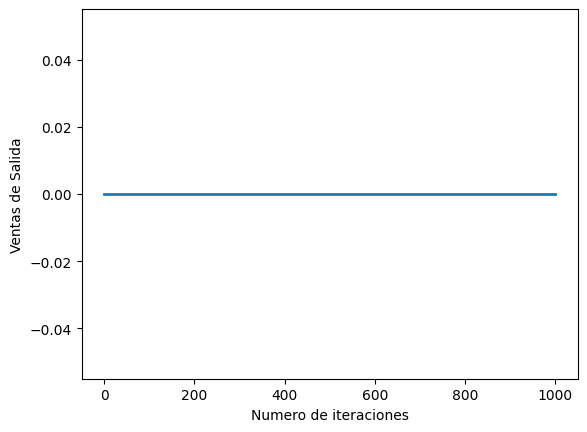

In [40]:
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f" 1RA RESPUESTA: LOS VALORES DE THETAS CON DESCENSO POR EL GRADIENTE. SON: { theta }")
print(f"con un costo de: { J_historico[-1]} ")
# Grafica la convergencia del costo
# Grafica la convergencia del costo utilizando la librería pyplot. Para hacer esto, utiliza el método plot para dibujar una línea que conecta los puntos formados por el número de iteraciones (np.arange(len(J_history))) y el valor del costo (J_history).
# El parámetro lw=2 indica que el grosor de la línea es 2. Luego, utiliza los métodos xlabel e ylabel para asignar etiquetas a los ejes horizontal y vertical,
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Ventas de Salida')

In [41]:
# DAR VALORES A Xs:
# el primer valor de X0 es 1 esto es ctte, los otros valores de Xs se modifica, (aqui no se cuenta la columna de 'Y")
# para asignar valores fijarse los valores de
X_array = [1,500,10.00,2,0.01,10,150.00,6,2005,2,2,2]

In [42]:
# CALCULAR 'Y' POR EL METODO DE DESCENSO POR EL GRADIENTE
#ingresar los valores de Xs
y_predDesGrad = np.dot(X_array,theta)
print('1RA RESPUESTA: El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(y_predDesGrad))

1RA RESPUESTA: El valor predecido es (usando el descenso por el gradiente): nan


In [43]:
# CALCULO DE THETAS PO METODO DE ECUACION DE LA NORMAL: SEGUNDO METODO (no modificar)
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [44]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"1DA RESPUESTA: LOS VALORES DE THETAS CON EC DE LA NORMAL SON: { theta }")

In [ ]:
# CALCULAR 'Y' POR EL METODO DE ECUACION DE LA NORMAL
price = np.dot(X_array, theta)
print('2DA RESPUESTA: La venta precedida (usando la ecuación de la normal): ${:.0f}'.format(price))